In [1]:
# Imports
import numpy as np
import pandas as pd
import random
import statsmodels.api as sm
from scipy.stats import linregress
from scipy.stats import chisquare
from scipy import stats
from numba import njit

# import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain, repeat
import pickle
import re
from math import exp, log

# Set Seaborn style
sns.set(style="whitegrid")
plt.style.use("ggplot")
sns.set_context("talk")
%matplotlib inline

In [11]:
[round(x) for x in np.linspace(0, 10000, 7).tolist()]

[0, 1667, 3333, 5000, 6667, 8333, 10000]

In [3]:
int(10000 / 6)

1666

In [13]:
random.randrange(0, 9)

4

In [15]:
chromosomeLocation = [0, 474, 687, 524]
for prime5, prime3 in zip(chromosomeLocation, chromosomeLocation[1:]):
    print(prime5, prime3)

0 474
474 687
687 524


In [12]:
nums = np.random.choice([0, 1], size=1000, p=[0.1, 0.9]).tolist()

In [14]:
l = [1, 2, 3, 4, 5, 6, 7, 8, 9]
l[3:9]

[4, 5, 6, 7, 8, 9]

In [18]:
np.nonzero([1, 0, 2])[0].tolist()

[0, 2]

In [3]:
k = np.zeros((1000, 5,))

In [18]:
np.all(k[:, 0:2] == 0)

True

In [17]:
len(k[:, 0:2])

1000

Text(0.05, 0.5, 'Avg. copy number')

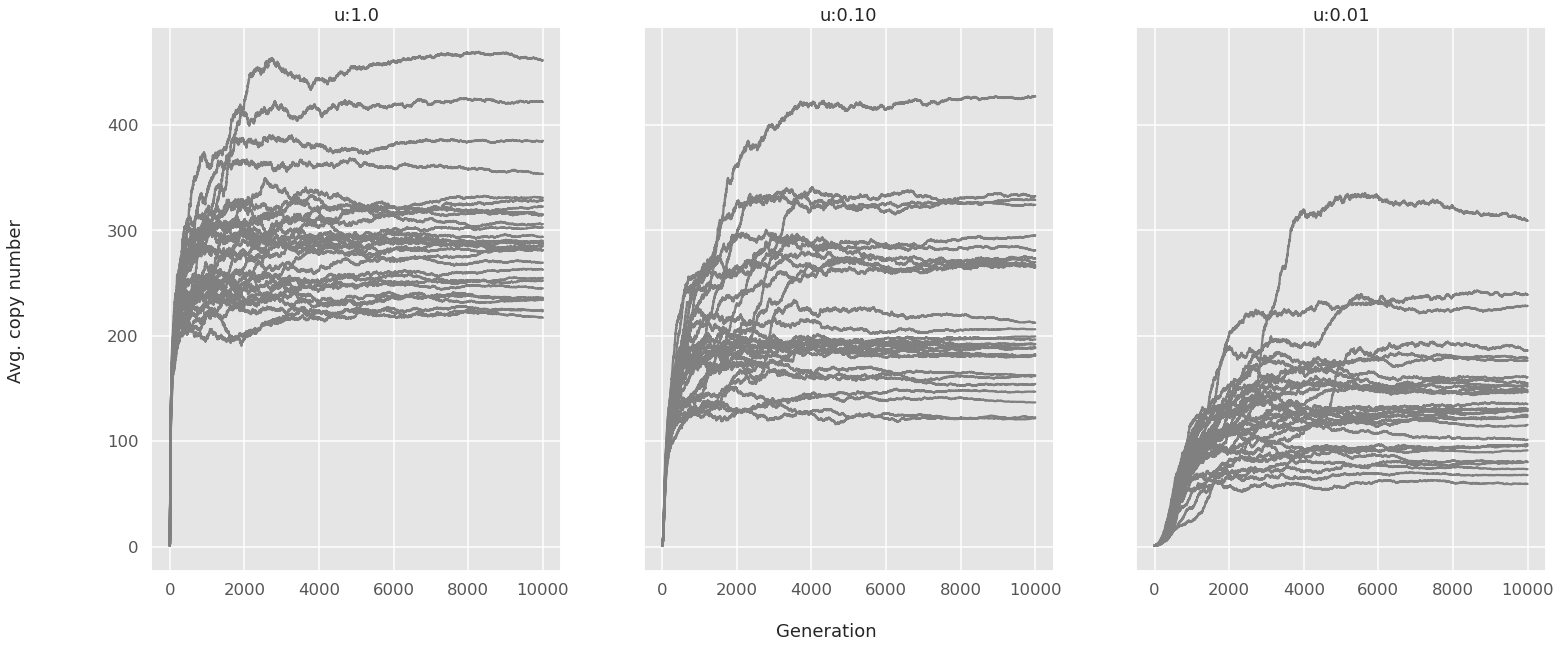

In [8]:
# Set up the figure
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(25, 10),)
# Load file from the pickle
fileName = "/home/siddharth/Documents/Projects/Simulicron/notebooks/K2U100.pickle"
with open(fileName, "rb") as f:
    result = pickle.load(f)
# Plot the average copy number
for i in result:
    f = sns.lineplot(
        x=np.arange(len(i["AvgCopyNum"])),
        y=np.asarray(i["AvgCopyNum"])/1000,
        color="grey",
        ax=ax1,
    ).set_title("u:1.0")
# Load file from the pickle
fileName = "/home/siddharth/Documents/Projects/Simulicron/notebooks/K2U010.pickle"
with open(fileName, "rb") as f:
    result = pickle.load(f)
# Plot the average copy number
for i in result:
    sns.lineplot(
        x=np.arange(len(i["AvgCopyNum"])),
        y=np.asarray(i["AvgCopyNum"])/1000,
        color="grey",
        ax=ax2,
    ).set_title("u:0.10")
# Load file from the pickle
fileName = "/home/siddharth/Documents/Projects/Simulicron/notebooks/K2U001.pickle"
with open(fileName, "rb") as f:
    result = pickle.load(f)
# Plot the average copy number
for i in result:
    sns.lineplot(
        x=np.arange(len(i["AvgCopyNum"])),
        y=np.asarray(i["AvgCopyNum"])/1000,
        color="grey",
        ax=ax3,
    ).set_title("u:0.01")


fig = ax1.figure
fig.text(0.5, 0.04, "Generation", ha="center", va="center", size=18)
fig.text(
    0.05,
    0.5,
    "Avg. copy number",
    ha="center",
    va="center",
    rotation=90,
    size=18,
)

In [26]:
numberOfInsertionSites = 10000
numberOfChromosomes = 6
chromosomeLocation = [
        round(x)
        for x in np.linspace(
            0, numberOfInsertionSites, numberOfChromosomes + 1
        ).tolist()
    ]
RecombinationRates = np.asarray([0.1] * numberOfInsertionSites)
RecombinationRates[chromosomeLocation[1:-1]] = 0.499

In [27]:
#map=c(0,cumsum(-0.5*log(1-2*rates)))
map = np.cumsum(-0.5*np.log(1-(2*RecombinationRates)))

In [83]:
print(0.5*(1-np.exp(-2*np.diff(map[l]))))

[0.244000]


In [ ]:
# np.set_printoptions(suppress=True)

In [21]:
def rates2map(rates):
    return (np.cumsum(-0.5*np.log(1-(2*RecombinationRates))))

In [22]:
def map2rates(map):
    return(0.5*(1-np.exp(-2*np.diff(map))))

In [23]:
map2rates(rates2map(RecombinationRates))

array([0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1])

In [25]:
len(rates2map(RecombinationRates))

10000

In [29]:
map[5]

0.6694306539426291

In [62]:
map[l]

array([0.557859, 0.892574])

In [46]:
np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})

In [48]:
RecombinationRates[855]

0.1

In [56]:
l = [4,7]

In [70]:
len(np.insert(RecombinationRates, 0, 99, axis=0))

10001

In [71]:
v1 = [3,4]
v2 = 0

In [73]:
cP1V1 = v1
cP1V2 = v2
if isinstance(cP1V1, list):
    cP1V1 = np.asarray(cP1V1)
else:
    cP1V1 = np.asarray([cP1V1])
if isinstance(cP1V2, list):
    cP1V2 = np.asarray(cP1V2)
else:
    cP1V2 = np.asarray([cP1V2])

In [80]:
%%timeit
list(set([2,3,2,4,6,4,2]) | set([0]))

460 ns ± 0.321 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [81]:
[7,8,55]+[4,45]

[7, 8, 55, 4, 45]

In [88]:
a = [5,4,3,2,1]
b = [2,3]

In [86]:
match = lambda a, b: [ b.index(x)+1 if x in b else None for x in a ]

In [90]:
match(b,a)

[4, 3]

In [95]:
RecombinationRates[0]

0.1

In [96]:
np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})

In [3]:
l = list(range(10000))

In [6]:
%%timeit
random.sample(l, 800)

608 µs ± 3.01 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [7]:
%%timeit
np.random.choice(l, size=800, replace=False)

910 µs ± 7.89 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [8]:
len(random.sample(l, 800)) == len (np.random.choice(l, size=800, replace=False))

True

In [23]:
l1 = [1,2,3,4,5,6,7]
l2 = [22,9,44,1,22,4,22,1]


In [10]:
match = lambda a, b: [ b.index(x) if x in b else 0 for x in a ]

In [24]:
match (l1,l2)

[3, 0, 0, 5, 0, 0, 0]

In [54]:
l1 = np.array([1,2,3,4])
z = np.array([1,1,1,1])
k1 = set([1,3,4,5,6,7])

In [33]:
np.in1d(l1,l2)

array([False, False,  True, False])

In [49]:
k1 = [1,2,3]

In [41]:
bool(set(k1) & set (k2))

True

In [56]:
q = z[np.in1d(l1,list(k2))] * 0

In [57]:
q

array([0, 0, 0])

In [58]:
z = {1:"z",2:"z"}

In [59]:
len(z.keys())

2

In [5]:
z = []
k = []
p = []
l = 10000
for i in range (l):
    z.append(int(random.random() * 10001))
    k.append(random.randint(0,10000))
    p = random.sample(range(100000), l)

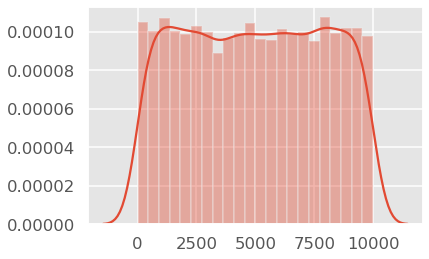

In [47]:
sns.distplot(z)

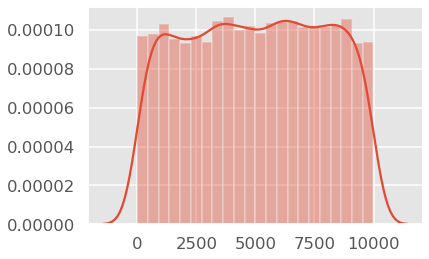

In [48]:
sns.distplot(k)

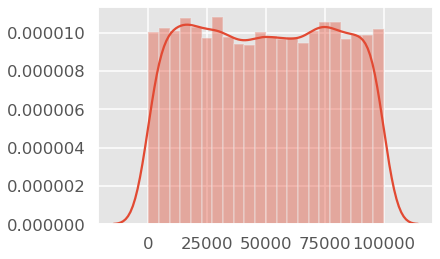

In [49]:
sns.distplot(p)

In [43]:
%%timeit
random.sample(range(10000), l)

328 µs ± 1.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [6]:
%%timeit
z = []
for i in range (l):
    (int(random.random() * 10001))

1.29 ms ± 37.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [3]:
%%timeit
np.random.uniform(0,1,10001)

53.1 µs ± 216 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [11]:
x = [1]*1000

In [17]:
%%timeit
x == [1] * len(x)

2.12 µs ± 15.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [6]:
sum([0.1,0.1,0.1])

0.30000000000000004

In [8]:
0.1*2

0.2

In [9]:
z = [1,2,3,4,5,6,7,8,9]

In [14]:
sum([x for k, x in enumerate(z) if k != 1])

43

In [16]:
list(set([4,4,5,3,2,1,1]))[2]

3

In [5]:
k = set([4,4,4,4,4,5])

In [4]:
@njit
def search(inp, setx):
    if inp in setx:
        return (True)

In [6]:
search(4,k)

/home/siddharth/miniforge3/lib/python3.7/site-packages/numba/core/ir_utils.py:2031: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected set' found for argument 'setx' of function 'search'.

For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "<ipython-input-4-8f6f1b132f21>", line 2:
@njit
def search(inp, setx):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


True

In [8]:
k = list(range(1000000))
z = np.asarray(k)

In [9]:
%%timeit
sum(k)

5.06 ms ± 42.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
%%timeit
np.sum(k)

44.9 ms ± 313 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
v1 = [0,0,[1],0,0]
v2 = [0,0,0,0,0]
fq = [0.1,0.2,0.3,0.4,0.5]

In [12]:
np.array([v1,v2,fq,], dtype="object").T

array([[1, 6, 0.1],
       [2, 7, 0.2],
       [3, 8, 0.3],
       [4, 9, 0.4],
       [5, 0, 0.5]], dtype=object)

In [17]:
np.c_[v1,v2]

array([[0, 0, 0.1],
       [0, 0, 0.2],
       [list([1]), 0, 0.3],
       [0, 0, 0.4],
       [0, 0, 0.5]], dtype=object)

In [12]:
if all(np.array_equal(v, [0, 0]) for v in np.c_[v1, v2]) :
       print (True)
else:
    print (False)

True


In [ ]:
np._c